In [2]:
from PIL import Image, ImageDraw

### Закрашенные треугольники

In [3]:
image = Image.open("bear.jpg")
draw = ImageDraw.Draw(image)
width  = image.size[0]
height = image.size[1]
pix = image.load()


def sign(x):
        if x > 0:
                return 1
        if x < 0:
                return -1
        return 0

    
def lineP(p1, p2, color):
        x1 = p1[0]
        y1 = p1[1]
        x2 = p2[0]
        y2 = p2[1]
        dX = abs(x2 - x1)
        dY = abs(y2 - y1)
        if dX >= dY:
            if x1 > x2:
                    x1, x2 = x2, x1
                    y1, y2 = y2, y1
            err = 0
            dErr = dY
            y = y1    
            dirY = sign(y2 - y1) 
            for x in range(x1, x2 + 1):
                    draw.point((x,y),color)
                    err += dErr
                    if err + err >= dX:
                            y += dirY  
                            err -= dX   
        else:
            if y1 > y2:
                    x1, x2 = x2, x1
                    y1, y2 = y2, y1
            err = 0 # накапливаемая "ошибка"
            dErr = dX
            x = x1
            dirX = sign(x2 - x1)
            for y in range(y1, y2 + 1):
                    draw.point((x,y),color)
                    err += dErr
                    if err + err >= dY:
                            x += dirX
                            err -= dY
                            
                            
def triangle (p1, p2, p3, color):
    
        # отсортированные по x точки
        p1, p2, p3 = sorted([p1, p2, p3])
        # прямая - основание
        base_k = (p3[1] - p1[1])/(p3[0] - p1[0])
        base_b = p3[1] - base_k * p3[0]
        # прямая - граница левого полу-треугольника
        left_k = (p2[1] - p1[1])/(p2[0] - p1[0])
        left_b = p2[1] - left_k * p2[0]
        # прямая - граница правого полу-треугольника
        right_k = (p3[1] - p2[1])/(p3[0] - p2[0])
        right_b = p3[1] - right_k * p3[0]
        
        # центральная точка находится под основанием
        if base_k * p2[0] + base_b < p2[1]:
            for x in range(p1[0], p2[0] + 1):
                upper = round(base_k * x + base_b)
                lower = round(left_k * x + left_b)
                for y in range(upper, lower):
                    draw.point((x, y), color)
            for x in range(p2[0], p3[0] + 1):
                upper = round(base_k * x + base_b)
                lower = round(right_k * x + right_b)
                for y in range(upper, lower):
                    draw.point((x, y), color)
                    
        # центральная точка находится над основанием
        else:
            for x in range(p1[0], p2[0] + 1):
                lower = round(base_k * x + base_b)
                upper = round(left_k * x + left_b)
                for y in range(upper, lower):
                    draw.point((x, y), color)
            for x in range(p2[0], p3[0] + 1):
                lower = round(base_k * x + base_b)
                upper = round(right_k * x + right_b)
                for y in range(upper, lower):
                    draw.point((x, y), color)
        
        #lineP(p1, p2, color)
        #lineP(p2, p3, color)
        #lineP(p1, p3, color)

black = (0, 0, 0)
green = (0, 200, 0)
red = (200, 0, 0)
blue = (0, 0, 200)

t1 = (0, height // 4)
t2 = (width // 2, 0)
t3 = (width // 4, height // 2)

t4 = (width -1, height // 2)
t5 = (width // 2,height // 4)
t6 = (width * 3 // 4, 0)

t7 = (0, height // 2)
t8 = (width // 4, height - 1)
t9 = (width // 2, height * 3 // 4)

t10 = (width - 1, height * 3 // 4)
t11 = (width * 3 // 4, height // 2)
t12 = (width // 2, height - 1)        
               
triangle(t1, t2, t3, green)
triangle(t4, t5, t6, red)
triangle(t7, t8, t9, blue)
triangle(t10, t11, t12, black)

#image.show()
del draw

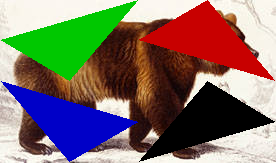

In [4]:
image